In [2]:
# To run locally as root
!apt-get -qq install -y libgfortran4 gawk

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [4]:
!python3 -m pip install --user pypka biopython

In [5]:
from pypka import Titration
import Bio
from Bio.PDB import PDBList
import os

In [6]:
pdbl = PDBList()
pdbl.retrieve_pdb_file('4lzt', file_format="pdb", pdir='.')
os.rename('pdb4lzt.ent', '4lzt.pdb')

In [7]:
params = {
    'structure'     : '4lzt.pdb',    
    'pH'            : "0,14",
    'ncpus'         : 1,
    'epsin'         : 15,
    'ionicstr'      : 0.1,
    'pbc_dimensions': 0,
    'convergence'   : 0.1
}

In [11]:
tit = Titration(params)  

Start Preprocessing
Start PB Calculations
PB Runs Ended                                                                                

MC Runs Ended                                                                                

Results
Chain  Site   Name      pK
   A      1    NTR     7.55
   A      1    LYS    10.41
   A      7    GLU     3.60
   A     13    LYS    11.13
   A     15    HIS     5.88
   A     18    ASP     3.38
   A     20    TYR    10.35
   A     23    TYR     9.74
   A     24    SER    Not In Range
   A     33    LYS     9.10
   A     35    GLU     4.82
   A     36    SER    Not In Range
   A     40    THR    Not In Range
   A     43    THR    Not In Range
   A     47    THR    Not In Range
   A     48    ASP     2.37
   A     50    SER    Not In Range
   A     51    THR    Not In Range
   A     52    ASP     3.11
   A     53    TYR    11.33
   A     60    SER    Not In Range
   A     66    ASP     2.96
   A     69    THR    Not In Range
   A     72    SER    Not 

In [17]:
pH = 7.0
for site in tit:
    pK = round(site.pK, 1) if site.pK else '-----'
    state = site.getProtState(pH)[0]    
    print(f'{site.res_name} {site.res_number:10} {pK:5} {state}')

NTR       5001   7.6 undefined
LYS          1  10.4 protonated
GLU          7   3.6 deprotonated
LYS         13  11.1 protonated
HIS         15   5.9 deprotonated
ASP         18   3.4 deprotonated
TYR         20  10.4 protonated
TYR         23   9.7 protonated
SER         24 ----- undefined
LYS         33   9.1 protonated
GLU         35   4.8 deprotonated
SER         36 ----- undefined
THR         40 ----- undefined
THR         43 ----- undefined
THR         47 ----- undefined
ASP         48   2.4 deprotonated
SER         50 ----- undefined
THR         51 ----- undefined
ASP         52   3.1 deprotonated
TYR         53  11.3 protonated
SER         60 ----- undefined
ASP         66   3.0 deprotonated
THR         69 ----- undefined
SER         72 ----- undefined
SER         81 ----- undefined
SER         85 ----- undefined
SER         86 ----- undefined
ASP         87   3.0 deprotonated
THR         89 ----- undefined
SER         91 ----- undefined
LYS         96  11.0 protonated
LYS     

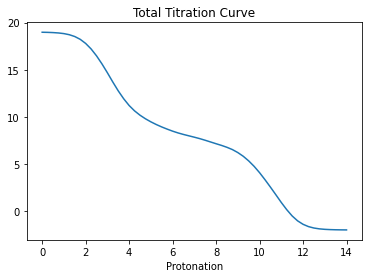

In [18]:
import matplotlib.pyplot as plt
tit_curve = tit.getTitrationCurve()
x = sorted(list(tit_curve.keys()))
y = [tit_curve[pH] for pH in x]
plt.title('Total Titration Curve')
plt.xlabel('pH')
plt.xlabel('Protonation')
plt.plot(x, y)
plt.show()